In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:,[3,4]].values

In [4]:
from sklearn.cluster import Birch
brc = Birch(threshold = 5.0, n_clusters = 5)
y_brc = brc.fit_predict(X)

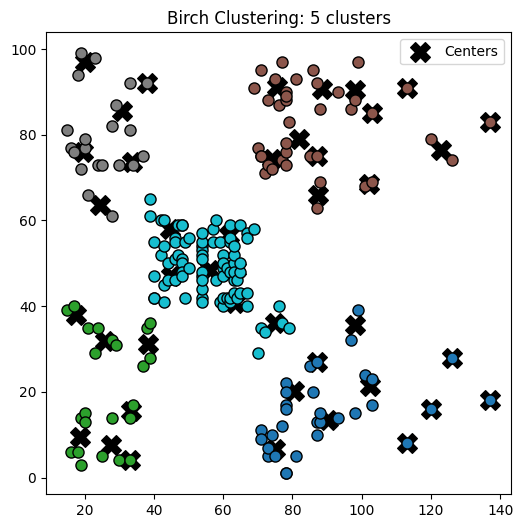

In [5]:
brc = Birch(threshold=5.0, n_clusters=5)
y_brc = brc.fit_predict(X)

# Extract labels and centers
labels = brc.labels_
centers = brc.subcluster_centers_   # Birch gives subcluster centers

n_clusters = len(np.unique(labels))

# Plot
plt.figure(figsize=(6,6))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

for k, col in zip(range(n_clusters), colors):
    class_members = (labels == k)
    
    # Plot points
    plt.plot(X[class_members, 0], X[class_members, 1], 'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k',
             markersize=8)

# Plot cluster centers (big X marks)
plt.scatter(
    centers[:, 0], centers[:, 1],
    c="black", s=200, marker="X", label="Centers"
)

plt.title(f"Birch Clustering: {n_clusters} clusters")
plt.legend()
plt.show()